In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Loading CSV into DataFrame

In [2]:
germanCredit1 = pd.read_csv('GermanCredit.csv')

### Preprocessing

**1. Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.)**

 **2. Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes.**

In [3]:
df = germanCredit1
df.replace('\'','', regex=True, inplace=True) 
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


**3. The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.**

In [4]:
df['checking_status'] = df['checking_status'].replace(['no checking'],'No Checking')
df['checking_status'] = df['checking_status'].replace(['<0'],'Low')
df['checking_status'] = df['checking_status'].replace(['0<=X<200'],'Medium')
df['checking_status'] = df['checking_status'].replace(['>=200'],'High')
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,Low,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,No Checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,Low,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


**4. The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').**

In [5]:
df['savings_status'] = df['savings_status'].replace(['no known savings'],'No Savings')
df['savings_status'] = df['savings_status'].replace(['<100'],'Low')
df['savings_status'] = df['savings_status'].replace(['100<=X<500'],'Medium')
df['savings_status'] = df['savings_status'].replace(['500<=X<1000'],'High')
df['savings_status'] = df['savings_status'].replace(['>=1000'],'High')
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


**5. Change class column values from 'good' to '1' and 'bad' to '0'.**

In [6]:
df['class'] = df['class'].replace(['good'],'1')
df['class'] = df['class'].replace(['bad'],'0')
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,1
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,1
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,0


**6. Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.**

In [7]:
df['employment'] = df['employment'].replace(['unemployed'],'Unemployed')
df['employment'] = df['employment'].replace(['<1'],'Amateur')
df['employment'] = df['employment'].replace(['1<=X<4'],'Professional')
df['employment'] = df['employment'].replace(['4<=X<7'],'Experienced')
df['employment'] = df['employment'].replace(['>=7'],'Expert')

In [8]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,1
996,Low,30,existing paid,used car,3857,Low,Professional,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,Professional,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,0


### Analysis

**1. Often we need to find correlations between categorical attributes, i.e. attributes that have values that fall in one of several categories, such as "yes"/"no" for attr1, or "low","medium","high" for attr2.**

**A. Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).**

In [9]:
pd.crosstab(df.foreign_worker, df.credit_history)

credit_history,all paid,critical/other existing credit,delayed previously,existing paid,no credits/all paid
foreign_worker,,,,,
no,1,14,0,20,2
yes,48,279,88,510,38


**B. Similarly, get the count of each category of employment for each category of saving_status.**

In [10]:
pd.crosstab(df.employment, df.savings_status)

savings_status,High,Low,Medium,No Savings
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Unemployed,3,40,7,12


**2.  Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding.**

In [11]:
df.loc[(df.personal_status == "male single") & (df.employment == "Experienced"), "credit_amount"].mean()

4142.592592592592

**3. Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding.**

In [12]:
durationSubset = df[['duration','job']] # Grab the subset.
newDurationSubset = durationSubset.groupby('job')['duration'].mean().reset_index()

In [13]:
newDurationSubset

,job,duration
0,high qualif/self emp/mgmt,25.168919
1,skilled,21.411111
2,unemp/unskilled non res,17.363636
3,unskilled resident,16.535000


**4. For the purpose 'education', what is the most common checking_status and savings_status? Your code should print:**

Most common checking status: ...

Most common savings status: ...

In [14]:
commonChecking = df.loc[(df.purpose == "education"), "checking_status"].mode()
commonSavings = df.loc[(df.purpose == "education"), "savings_status"].mode()
print('Most common checking status:',commonChecking)
print('Most common savings status:',commonSavings)

Most common checking status: 0    No Checking
dtype: object
Most common savings status: 0    Low
dtype: object


### Visualization 

**1. Plot subplots of two bar charts: one for savings_status (x-axis) to personal status (y-axis), and another for checking_status (x-axis) to personal_status (y-axis). In each of the charts, each personal status category bar (number of people in that category) should be of a different color.**

In [ ]:
savings_status = df.groupby('savings_status')['personal_status'].value_counts()
high_status = savings_status['High']
print(high_status, '\n')
low_status = savings_status['Low']
print(low_status,'\n')
medium_status = savings_status['Medium']
print(medium_status,'\n')
no_savings_status = savings_status['No Savings']
print(no_savings_status)

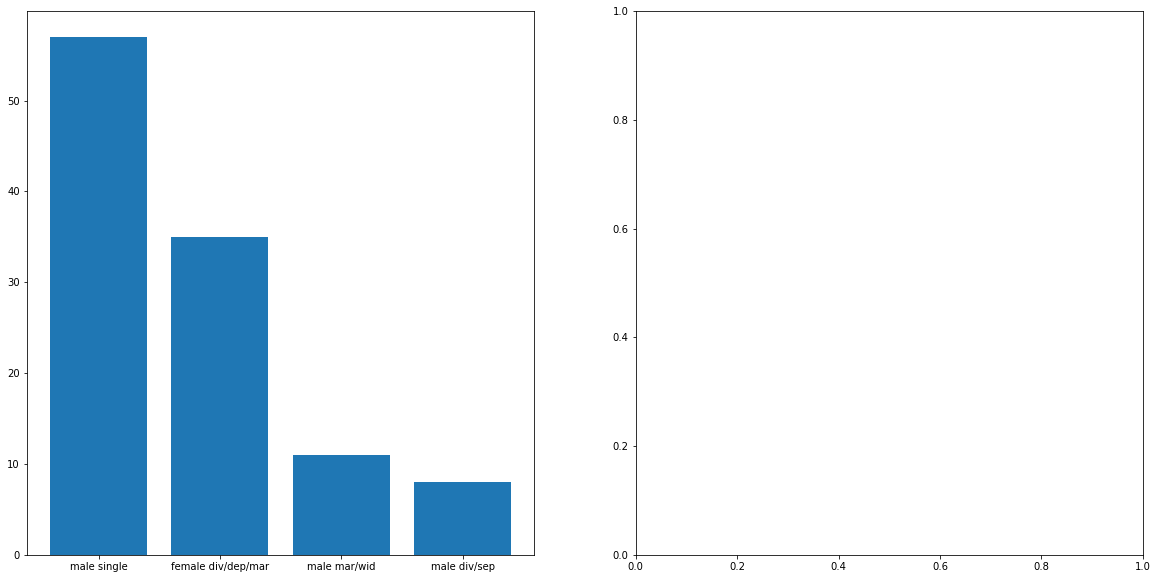

In [29]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
axes[0].bar(high_status.index, high_status.values)
plt.show()

**2. For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).**

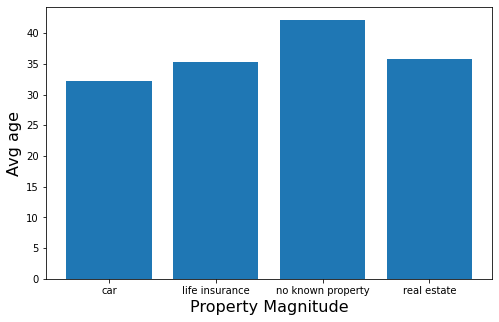

In [17]:
credit_4k_df = df[df['credit_amount'] > 4000]
credit_4k_avg_age_df = credit_4k_df.groupby('property_magnitude')['age'].mean()

plt.figure(figsize=(8,5))
plt.bar( credit_4k_avg_age_df.index, credit_4k_avg_age_df.values)
plt.xlabel('Property Magnitude', fontsize=16)
plt.ylabel('Avg age',fontsize=16)
plt.show()

**3. For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts:**

    a. Personal status
    b. Credit history
    c. Job

In [19]:
high_savings_status_df = df[df['savings_status'] == 'High']
above_40_and_high_save_df = high_savings_status_df[high_savings_status_df['age'] > 40]

personal_status = above_40_and_high_save_df['personal_status'].value_counts()
credit_history = above_40_and_high_save_df['credit_history'].value_counts()
job = above_40_and_high_save_df['job'].value_counts()

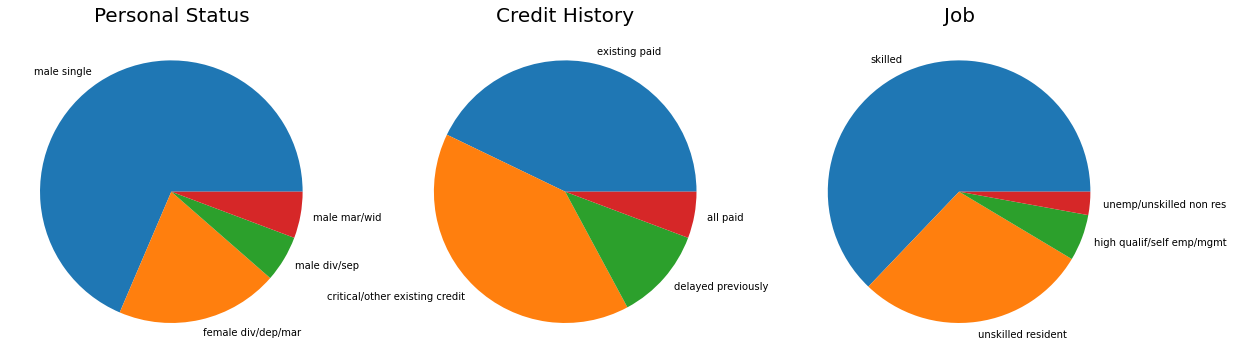

In [21]:
fig, axes = plt.subplots(1,3, figsize=(20,10))

axes[0].pie(personal_status.values, labels=personal_status.index)
axes[1].pie(credit_history.values, labels=credit_history.index)
axes[2].pie(job.values, labels=job.index)
axes[0].set_title('Personal Status', fontsize=20)
axes[1].set_title('Credit History', fontsize=20)
axes[2].set_title('Job', fontsize=20)
plt.show()